In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
<p>Connaitre l'encodage du fichier source</p>

</div>

In [ ]:
import chardet
with open("source.csv", rb) as fichier_brut:
    encodage = chardet.detect(fichier_brut.read(1000))

print(encodage)
# >>> { 'encoding' : 'UTF-8-SIG', 'confidence': 1.0, 'language' : ''}

df = pd.read_csv("source.csv", encoding='utf-sig-8')

In [32]:
df = pd.DataFrame(
    {
        'Variable_1':[10, None, 12, 13, 12],
        'Variable_2': ['A', 'B', 'C', 'D', np.nan]
    }
)

df


,Variable_1,Variable_2
0,10.0,A
1,NaN,B
2,12.0,C
3,13.0,D
4,12.0,NaN


<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
<p>Récupération des noms de variables vides</p>
</div>

In [28]:
empty_variables = df.columns[df.isna().all()].tolist()
empty_variables

[]

<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
<p>Remplacement des manquants par 0, voir librairie Missingno</p>
</div>

In [ ]:
df['A'].fillna(0, inplace=True)

<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
<p>Taux de remplissage par variables</p>
</div>

fill_rate = df.count() / len(df) * 100

<div style="
    background-color: #c8a043ff; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
<h3>Variables catégorielles</h3>
</div>

<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
<p>Récupération des variables n'ayant qu'une seule modalité</p>
</div>

In [ ]:
# dropna=False force à considérer les valeurs manquantes comme une modalité
unique_variables = df.columns[ (df.nunique(dropna=False) == 1 ).values].tolist()

<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
<p>Regroupe les catégories rares</p>
</div>

In [ ]:
def group_rare_categorie(df, column, threshold=5, new_label='Other'):
    """
    Pour un DataFrame (df)
    la fonction regroupe les catégories rares
    fixées par un seuil (threshold) d'une variable catégorielle (column)
    sous l'étiquette 'labenew_l'
    """
    # calcul de la fréquence des modalités
    frequency = df[column].value_counts()
    # identification des catégories rares
    rare_categories = frequency[frequency < threshold].index
    # remplacement des catégories rares par 'Other'
    df[columns] = df[columns].replace(rare_categories, new_label) 

<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h4>Tableau de contingence ou tableau croisé</h4>
<p>Explore les associations entres 2 variables</p>
</div>

In [ ]:
contengency_table = pd.crosstab(df['column_1'], df['column_2'])

<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Indice de diversité</h3>
    <p>quantifient la répartition et l'équilibre des catégories au sein dune variable ou d'un couple de variables</p>
    <h4> Indice de diversité de Berger-Parker</h4>
    Proportion de la ctégorie la plus importante<br>
    Plus il est proche de 1, plus la diversité est faible et inversement
    <h4>Indice de diversité de Simpson</h4>
    <p>Proportion ...</p>
    P...
</div>

In [ ]:
def berger_parker_index(df):
    """
    Calcule l'indice de Berger-Parker pour une variable catégorielle
    """
    # Normalisation par colonne
    proportion = df.div(df.sum(axis=0), axis=1)
    # Extraction de la valeur maximale par ligne
    max_proportion = proportion.max(axis=1)
    # Calcul de l'indice de Berger-Parker

    p211
    

<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Fonctions</h3>
<p>détection des outliers</p>
<ul><li>méthode des quartiles (écart interquartiles)</li><li>méthode des z-score</li>
</ul>
</div>

In [ ]:
def detect_outliers_iqr(data, factor=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return (data < lower_bound) | (data > upper_bound)


def detect_outliers_z_score(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    return np.abs(z_scores) > threshold

In [ ]:
# Création de données de test
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=100)

# Ajout d'outliers
data[0] = 10
data[1] = -10

# Détection des outliers avec la méthode des quartiles
outliers_iqr = detect_outliers_iqr(pd.Series(data))
print("Outliers détectés par la méthode des quartiles:")
print(pd.Series(data)[outliers_iqr])

Outliers détectés par la méthode des quartiles:
0    10.0
1   -10.0
dtype: float64


<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Local Outlier Factor</h3>

</div>

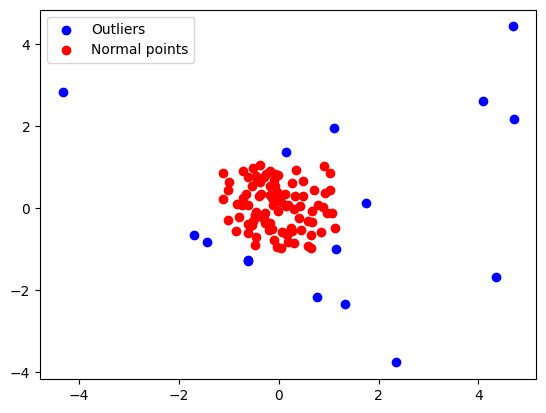

In [ ]:
np.random.seed(0)

# matrice de données avec 100 échantillons et 2 caractéristiques
# random.randn génère des échantillons à partir d'une distribution normale entre 0 et 1
X = 0.6 * np.random.randn(100, 2)

# Insertion de quelques outliers
# random.uniform génère des valeurs aléatoires uniformément distribuées entre low et high
X_outliers = np.random.uniform(low=-5, high=5, size=(10, 2))

# Compilation verticale des données normales et des outliers
X = np.vstack([X, X_outliers])

# Entrainement du modèle LOF
clf = LocalOutlierFactor(n_neighbors=10)

# Entrainement et prédiction
# Définin chaque point comme normal ou pas
# -1 pour les outliers et 1 pour les points normaux
y_pred = clf.fit_predict(X)

# Création d'un masque pour les outliers
outliers_mask = y_pred == -1

# outliers en bleu
plt.scatter(X[outliers_mask, 0], X[outliers_mask, 1], color='b', label='Outliers')
# points normaux en rouge
plt.scatter(X[~outliers_mask, 0], X[~outliers_mask, 1], color='r', label='Normal points')
plt.legend()
plt.show()

<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Changement de la distribution</h3>

</div>

In [ ]:
# Transformation logarithmique
df['variable_log'] = np.log(['Variable'])

# Transformation de la racine carrée
df['variable_sqrt'] = np.sqrt(df['Variable'])

<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Imputation Pandas</h3>
<ul>
<li>modale</li>
<li>médiane</li>
<li>moyenne</li>
</ul>
<p>Selon le taux de valeurs manquante,<br>l'imputation par la moyenne augmente le nombre d'outliers</p>
</div>

In [ ]:
# Remplir les valeurs manquantes avec la modalité la plus fréquente
# précise l'indicece [0] au cas ou il y a plusieurs modalités
df['variable'] = df['Variable'].fillna(df['Variable'].mode()[0])

# Imputation par la moyenne avec pandas
df['variable'] = df['Variable'].fillna(df['Variable'].mean())

# Imputation par la m&diane avec pandas
df['variable'] = df['Variable'].fillna(df['Variable'].median())


<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Imputation Scikit-learn</h3>
<ul>
<li>modale</li>
<li>médiane</li>
<li>moyenne</li>
</ul>
</div>

In [ ]:

from sklearn.impute import SimpleImputer

imputer_mode = SimpleImputer(strategy='most_frequent')
df['variable'] = imputer_mode.fit_transform(df[['Variable']])

imputer_mean = SimpleImputer(strategy='mean')
df['variable'] = imputer_mean.fit_transform(df[['Variable']])

imputer_median = SimpleImputer(strategy='median')
df['variable'] = imputer_median.fit_transform(df[['Variable']])

<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Imputation par regression</h3>
<p>
Pour une variable cible Y contenant des valeurs manquantes :

Séparer les lignes avec Y connu et Y manquant.

Entraîner un modèle de régression Y ~ X sur les lignes complètes.

Prédire les valeurs manquantes à partir des autres variables.

Remplacer les NaN par ces prédictions.

C’est une imputation plus intelligente que mean/median/mode.
</p>
</div>

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10)
df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)


In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Exemple : variables numériques et catégorielles
numerical_cols = ['age', 'income', 'Variable']     # Variable à imputer
categorical_cols = ['genre', 'ville']

# Préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ("num", IterativeImputer(estimator=RandomForestRegressor(), max_iter=10), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Pipeline complet
pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor())
])

# Entraînement du pipeline
pipeline.fit(df[numerical_cols + categorical_cols], df['Variable'])


In [ ]:
from sklearn.impute import KNNImputer

cols_with_missing = ['Variable']
imputer = KNNImputer(n_neighbors=5)
df[cols_with_missing] = imputer.fit_transform(df[cols_with_missing])

<div style="
    background-color: #439cc8; 
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Bibliothèque d'Imputation</h3>
<p>
Fancyimpute

impyute
</p>
</div>